# Análisis de datos: Encuesta de presupuestos familiares en España 2022

### Fuente: INE 2022

Autor: Santiago Haro

#### Importo librerías y cargo base de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.float_format = '{:.2f}'.format  # Para que me muestre solo dos decimales en mi df en datos float
pd.set_option('display.max_columns', None) # Para que .head() muestre todas las columnas de mi df

In [3]:
df=pd.read_csv("C:/Users/Santiago/Downloads/datos_2022/EPFhogar/CSV/EPFhogar_2022.csv",delimiter="\t")

In [4]:
## Revisión de los datos
df.head()

,ANOENC,NUMERO,CCAA,NUTS1,CAPROV,TAMAMU,DENSIDAD,CLAVE,CLATEO,FACTOR,NMIEMB,TAMANO,NMIEMSD,NMIEMHU,NMIEMIN,NMIEM1,NMIEM2,NMIEM3,NMIEM4,NMIEM5,NMIEM6,NMIEM7,NMIEM8,NMIEM9,NMIEM10,NMIEM11,NMIEM12,NMIEM13,NUMACTI,NUMINACTI,NUMOCU,NUMNOCU,NUMESTU,NUMNOESTU,NNINOSD,NHIJOSD,UC1,UC2,PF2TEO,PF2RECO,TIPHOGAR1,TIPHOGAR2,TIPHOGAR3,TIPHOGAR4,TIPHOGAR5,TIPHOGAR6,TIPHOGAR7,TIPHOGAR8,TIPHOGAR9,TIPHOGAR10,TIPHOGAR11,SITUOCUHOG,SITUACTHOG,NORDENSP,EDADSP,SEXOSP,PAISNACSP,NACIONASP,PAISSP,SITURESSP,ECIVILLEGALSP,NORDENCOSP,UNIONSP,CONVIVENCIASP,NORDENPASP,PAISPADRESP,NORDENMASP,PAISMADRESP,ESTUDIOSSP,ESTUDREDSP,SITUACTSP,SITUREDSP,OCUSP,JORNADASP,PERCEPSP,IMPEXACPSP,INTERINPSP,TRABAJO,OCUPA,OCUPARED,ACTESTB,ACTESTBRED,SITPROF,SECTOR,CONTRATO,TIPOCONT,SITSOCI,SITSOCIRE,REGTEN,TIPOEDIF,ZONARES,TIPOCASA,NHABIT,ANNOCON,SUPERF,AGUACALI,FUENAGUA,CALEF,FUENCALE,DISPOSIOV,NUMOVD,REGTENV1,MESESV1,DIASV1,AGUACV1,FUENACV1,CALEFV1,FUENCAV1,REGTENV2,MESESV2,DIASV2,AGUACV2,FUENACV2,CALEFV2,FUENCAV2,REGTENV3,MESESV3,DIASV3,AGUACV3,FUENACV3,CALEFV3,FUENCAV3,REGTENV4,MESESV4,DIASV4,AGUACV4,FUENACV4,CALEFV4,FUENCAV4,REGTENV5,MESESV5,DIASV5,AGUACV5,FUENACV5,CALEFV5,FUENCAV5,REGTENV6,MESESV6,DIASV6,AGUACV6,FUENACV6,CALEFV6,FUENCAV6,REGTENV7,MESESV7,DIASV7,AGUACV7,FUENACV7,CALEFV7,FUENCAV7,REGTENV8,MESESV8,DIASV8,AGUACV8,FUENACV8,CALEFV8,FUENCAV8,REGTENV9,MESESV9,DIASV9,AGUACV9,FUENACV9,CALEFV9,FUENCAV9,GASTOT,IMPUTGAS,GASTMON,GASTNOM1,GASTNOM2,GASTNOM3,GASTNOM4,CAPROP,CAJENA,PENSIO,DESEM,OTRSUB,RENTAS,OTROIN,FUENPRIN,FUENPRINRED,IMPEXAC,INTERIN,NUMPERI,COMIMH,COMISD,COMIHU,COMIINV,COMITOT
0,2022,1,11,4,6,5,3,1,2,299.94,2,2,0,0,0,2,0,0,2,0,2,0,0,0,0,2,0,0,1,1,1,1,0,2,0,0,1.70,1.50,1,1,6,6,5,6,6,5,3,2,2,3,3,5,5,1,63,1,1,1,,1,2,2,1,1,99,1,99,1,2,1,1,1,1,1,1,1292.00,03,1,5,3,O,3,1,1,1,1,3,1,1,2,7,2,6,6,88,1,3,6,,1,1.00,1,12.00,-9.00,1,6,6,,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,11081660.02,26.49,8146363.94,125973.63,NaN,NaN,2809322.45,6,1,6,6,6,6,6,2,2,1292,3,1,26,0,0,0,26
1,2022,2,13,3,1,1,1,1,1,3943.51,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1.00,1.00,0,0,2,2,2,3,3,1,1,2,1,1,1,-9,-9,1,40,6,1,1,,1,1,99,,3,99,1,99,1,7,4,1,1,1,1,1,-9.00,03,1,2,2,N,3,1,6,1,2,2,2,2,4,3,2,5,6,60,1,2,1,2,6,NaN,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,73570285.64,0.00,43460512.00,NaN,NaN,NaN,30109773.64,6,1,6,6,6,6,6,2,2,1245,3,1,14,0,0,0,14
2,2022,3,15,2,1,1,1,1,1,247.96,3,3,0,0,0,2,1,1,2,1,2,0,1,0,0,2,0,0,2,1,2,1,0,3,1,1,2.20,1.80,1,1,7,7,6,9,9,7,4,3,5,4,4,2,2,2,45,1,1,1,,1,2,1,1,1,99,1,99,1,7,4,1,1,1,1,1,-9.00,06,1,2,2,O,3,1,1,1,1,4,2,2,3,3,2,4,6,85,1,2,1,2,6,NaN,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,7595734.06,0.00,5383174.51,NaN,NaN,NaN,2212559.55,6,1,6,6,6,6,6,2,2,3231,7,2,41,0,0,0,41
3,2022,4,10,5,6,3,2,1,2,984.03,2,2,0,0,0,2,0,0,2,0,2,0,0,0,0,1,1,0,1,1,1,1,0,2,0,0,1.70,1.50,1,1,10,10,10,5,5,4,7,4,2,6,6,-9,-9,1,41,1,1,1,,1,1,99,,3,99,1,2,1,7,4,1,1,1,1,1,-9.00,06,1,2,2,P,3,1,1,1,1,4,2,1,2,3,2,6,6,100,1,3,6,,6,NaN,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,40675027.38,0.00,36907728.65,NaN,NaN,NaN,3767298.73,6,1,1,6,6,6,6,2,2,3496,7,2,27,0,0,0,27
4,2022,5,3,1,6,5,3,1,1,585.01,4,4,0,0,0,4,0,1,3,2,2,0,1,1,0,2,0,0,1,3,0,4,1,3,2,2,3.10,2.50,3,2,11,8,7,10,10,7,5,4,5,4,4,8,5,2,47,1,1,1,,1,2,1,1,1,99,1,99,1,3,2,6,2,2,,1,736.00,02,1,6,4,A,1,1,6,1,1,10,6,2,1,7,1,5,6,118,1,1,1,5,6,NaN,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,,NaN,NaN,,,,,18465086.70,3.84,15822282.51,NaN,NaN,NaN,2642804.19,6,6,6,1,1,6,6,4,3,736,2,1,56,0,0,0,56


#### Información sobre la cantidad de filas y columnas (variables) de mi Data frame

In [5]:
df.shape

(20585, 188)

In [6]:
df.dtypes  ## Muestra información sobre el tipo de variable (Número entero, texto, decimal, etc.)

ANOENC     int64
NUMERO     int64
CCAA       int64
NUTS1      int64
CAPROV     int64
           ...  
COMIMH     int64
COMISD     int64
COMIHU     int64
COMIINV    int64
COMITOT    int64
Length: 188, dtype: object

#### Exploración de datos, catidad de observaciones por CCAA

Aquí podemos observar el número de hogares encuestados por CCAA

In [7]:
df['CCAA'].value_counts().sort_index() ## Equivalente a TAB  en Stata

1     2308
2      863
3      953
4      458
5      957
6      729
7     1329
8     1054
9     1640
10    1645
11    1000
12    1367
13    1717
14     911
15     659
16    2181
17     601
18     113
19     100
Name: CCAA, dtype: int64

### Análsis del tamaño de los hogares en España

#### Exploración de datos: Tabla cruzada, tipo de hogar por CCAA (sin etiquetas)

Aquí se muestra un ejemplo de tabla cruzada sin etiquetas (no sabemos a qué CCAA o Tipo de hogar se refieren los títulos de la tabla cruzada)

In [8]:
pd.crosstab(df['CCAA'], df['TIPHOGAR1']) # Tabla cruzada de frecuencias


TIPHOGAR1,1,2,3,4,5,6,7,8,9,10,11,12
CCAA,,,,,,,,,,,,
1,208,253,12,58,286,270,161,196,37,165,496,166
2,83,125,1,12,114,107,74,68,12,59,163,45
3,124,133,2,20,140,102,61,40,5,76,169,81
4,34,87,3,15,37,63,38,35,4,28,69,45
5,58,137,3,32,72,117,82,52,8,97,200,99
6,76,108,2,13,98,87,41,55,8,59,117,65
7,171,163,3,22,206,162,95,87,11,87,242,80
8,87,111,4,16,141,134,70,103,12,60,246,70
9,143,219,7,33,196,189,113,143,18,128,339,112


#### Exploración de datos: Tabla cruzada, No. de miembros en el hogar por CCAA (proceso con etiquetas)

In [9]:
# Tabla cruzada de número de miembros por hogar por CCAA

miembros_hogar = pd.crosstab(df['CCAA'], df['TAMANO'], values=df['FACTOR'], aggfunc='sum', margins=True, margins_name='Total') 
# Margins sirve para mostrat los totales tanto por CCAA como por No. de miembros en el hogar
miembros_hogar

TAMANO,1,2,3,4,5,6,Total
CCAA,,,,,,,
1,843022.25,931197.00,684183.75,630195.51,169309.08,50154.16,3308061.75
2,160077.02,167378.88,108157.75,88017.43,16956.04,4922.15,545509.27
3,144927.00,153891.00,93543.50,51516.59,8222.59,2050.06,454150.75
4,115336.25,141695.25,94292.25,77274.16,22917.74,17926.60,469442.25
5,224553.03,249686.50,193798.28,142450.59,41088.88,23035.00,874612.28
6,72138.75,75497.25,50352.50,34370.94,10830.94,1971.87,245162.25
7,321640.25,330711.00,196698.50,143254.62,27459.74,6222.89,1025987.00
8,207774.00,233500.75,161274.50,157147.39,30826.72,13781.64,804305.00
9,835525.44,961659.62,608912.25,499112.35,144912.42,42913.73,3093035.80


In [10]:
## AGREGO ETIQUETAS A LOS DATOS ##

etiquetas_ccaa = {
    1: 'Andalucía',
    2: 'Aragón',
    3: 'Asturias, Principado de',
    4: 'Balears, Illes',
    5: 'Canarias',
    6: 'Cantabria',
    7: 'Castilla y León',
    8: 'Castilla – La Mancha',
    9: 'Cataluña',
    10: 'Comunitat Valenciana',
    11: 'Extremadura',
    12: 'Galicia',
    13: 'Madrid, Comunidad de',
    14: 'Murcia, Región de',
    15: 'Navarra, Comunidad Foral de',
    16: 'País Vasco',
    17: 'Rioja, La',
    18: 'Ceuta',
    19: 'Melilla'
}



etiquetas_tamano = {
    1: 'Una persona',
    2: 'Dos personas',
    3: 'Tres personas',
    4: 'Cuatro personas',
    5: 'Cinco personas',
    6: 'Seis o más personas',
}


# Agregar una nueva columna 'Etiqueta_CCAA' con las etiquetas
df['Etiqueta_CCAA'] = df['CCAA'].map(etiquetas_ccaa)
df['Etiqueta_TAMANO'] = df['TAMANO'].map(etiquetas_tamano)


In [11]:
df.loc[:, ['Etiqueta_CCAA', "CCAA"]] ## Verifico que la columna nueva se añadió y coincide con CCAA

,Etiqueta_CCAA,CCAA
0,Extremadura,11
1,"Madrid, Comunidad de",13
2,"Navarra, Comunidad Foral de",15
3,Comunitat Valenciana,10
4,"Asturias, Principado de",3
...,...,...
20580,Extremadura,11
20581,Castilla – La Mancha,8
20582,Galicia,12
20583,Cantabria,6


A continuación se muestra la cantidad de hogares en España usando el factor de expasión de la encuesta

In [12]:
## MUESTRO TABLA CRUZADA EN VALORES PONDERADOS  ##

miembros_hogar = pd.crosstab(df['Etiqueta_CCAA'], df['Etiqueta_TAMANO'], values=df['FACTOR'], aggfunc='sum', margins=True, margins_name='Total')


# Define el orden deseado de las etiquetas de TAMANO
orden_etiquetas_tamano = [
    'Una persona',
    'Dos personas',
    'Tres personas',
    'Cuatro personas',
    'Cinco personas',
    'Seis o más personas',
    'Total'  # Agrega "Total" al final
]

miembros_hogar = miembros_hogar.reindex(columns=orden_etiquetas_tamano)


miembros_hogar

Etiqueta_TAMANO,Una persona,Dos personas,Tres personas,Cuatro personas,Cinco personas,Seis o más personas,Total
Etiqueta_CCAA,,,,,,,
Andalucía,843022.25,931197.00,684183.75,630195.51,169309.08,50154.16,3308061.75
Aragón,160077.02,167378.88,108157.75,88017.43,16956.04,4922.15,545509.27
"Asturias, Principado de",144927.00,153891.00,93543.50,51516.59,8222.59,2050.06,454150.75
"Balears, Illes",115336.25,141695.25,94292.25,77274.16,22917.74,17926.60,469442.25
Canarias,224553.03,249686.50,193798.28,142450.59,41088.88,23035.00,874612.28
Cantabria,72138.75,75497.25,50352.50,34370.94,10830.94,1971.87,245162.25
Castilla y León,321640.25,330711.00,196698.50,143254.62,27459.74,6222.89,1025987.00
Castilla – La Mancha,207774.00,233500.75,161274.50,157147.39,30826.72,13781.64,804305.00
Cataluña,835525.44,961659.62,608912.25,499112.35,144912.42,42913.73,3093035.80


In [13]:
## Mostrar el número de hogares en España el 2022

hogares_espana = int(miembros_hogar.loc['Total', 'Total'])  # Convierte el valor a entero
formatted_hogares = '{:,}'.format(hogares_espana)  # Formatea el número con comas
print(f'España tiene en 2022 {formatted_hogares} hogares')

España tiene en 2022 19,034,311 hogares


In [14]:
## MUESTRO TABLA CRUZADA EN VALORES PONDERADOS EN PORCENTAJES  ##


# Calcula los porcentajes dividiendo cada valor por el total de su respectiva fila
miembros_hogar_porcentaje = miembros_hogar.div(miembros_hogar['Total'], axis=0) * 100

# Muestra la tabla cruzada en forma de porcentajes
miembros_hogar_porcentaje

Etiqueta_TAMANO,Una persona,Dos personas,Tres personas,Cuatro personas,Cinco personas,Seis o más personas,Total
Etiqueta_CCAA,,,,,,,
Andalucía,25.48,28.15,20.68,19.05,5.12,1.52,100.00
Aragón,29.34,30.68,19.83,16.13,3.11,0.90,100.00
"Asturias, Principado de",31.91,33.89,20.60,11.34,1.81,0.45,100.00
"Balears, Illes",24.57,30.18,20.09,16.46,4.88,3.82,100.00
Canarias,25.67,28.55,22.16,16.29,4.70,2.63,100.00
Cantabria,29.42,30.79,20.54,14.02,4.42,0.80,100.00
Castilla y León,31.35,32.23,19.17,13.96,2.68,0.61,100.00
Castilla – La Mancha,25.83,29.03,20.05,19.54,3.83,1.71,100.00
Cataluña,27.01,31.09,19.69,16.14,4.69,1.39,100.00


In [15]:
# Calcula los porcentajes sobre el total de cada columna
miembros_hogar_porcentajes_columnas = miembros_hogar.div(miembros_hogar.loc['Total'], axis=1)*100

# El resultado tendrá los porcentajes sobre el total de cada columna
miembros_hogar_porcentajes_columnas

Etiqueta_TAMANO,Una persona,Dos personas,Tres personas,Cuatro personas,Cinco personas,Seis o más personas,Total
Etiqueta_CCAA,,,,,,,
Andalucía,16.32,16.28,17.82,19.96,20.12,16.11,17.38
Aragón,3.10,2.93,2.82,2.79,2.01,1.58,2.87
"Asturias, Principado de",2.81,2.69,2.44,1.63,0.98,0.66,2.39
"Balears, Illes",2.23,2.48,2.46,2.45,2.72,5.76,2.47
Canarias,4.35,4.37,5.05,4.51,4.88,7.40,4.59
Cantabria,1.40,1.32,1.31,1.09,1.29,0.63,1.29
Castilla y León,6.23,5.78,5.12,4.54,3.26,2.00,5.39
Castilla – La Mancha,4.02,4.08,4.20,4.98,3.66,4.43,4.23
Cataluña,16.18,16.81,15.86,15.81,17.22,13.78,16.25


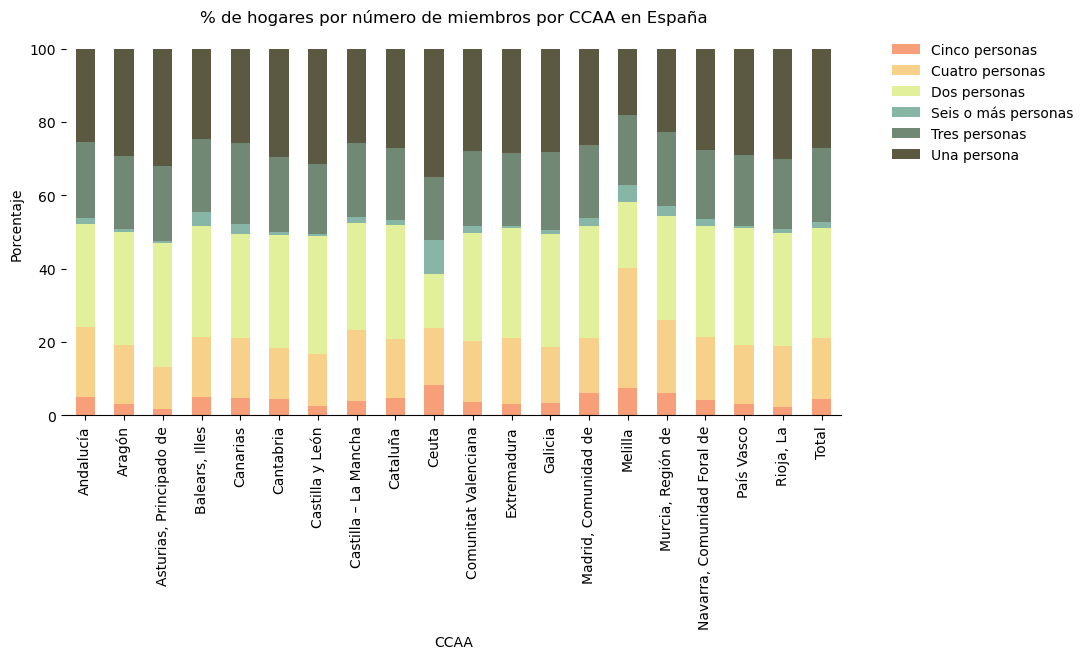

In [16]:

# Seleccionar todas las columnas excepto 'Total'
columnas_para_graficar = miembros_hogar_porcentaje.columns.difference(['Total'])

# Crear un gráfico de barras con las columnas seleccionadas
# ax es el nombre que le doy a mi gráfico, puedo llamarlo como quiera


# Definir una paleta de colores personalizada
colores_personalizados = ['#F79F79', '#F7D08A', '#e3f09b', '#87B6A7', '#718874', '#5B5941']


# Crear un gráfico de barras con las columnas seleccionadas y la paleta de colores personalizada
# ax es un nombre que le pongo al gráfico, puede ser cualquiera
ax = miembros_hogar_porcentaje[columnas_para_graficar].plot(kind='bar', stacked=True, figsize=(10, 5), color=colores_personalizados)
plt.xlabel('CCAA')
plt.ylabel('Porcentaje')
plt.title('% de hogares por número de miembros por CCAA en España')

# Mover la leyenda fuera del cuadro
# legend es el nombre que le doy a la etiqeuta de colores, puedo llamarlo como quiera
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Eliminar el margen de etiquetas
legend.get_frame().set_visible(False)

# Eliminar el margen de las barras
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)



## Histograma tamaño del hogar español

En este gráfico se muestra el porcentaje de hogares por número de miembros. Hay que tener en cuenta que el valor 6, incluye 6 o más mienbros en el hogar.
Los hogares con uno y dos miembros son los más comunes y representan 57.18% del total de hogares españoles.

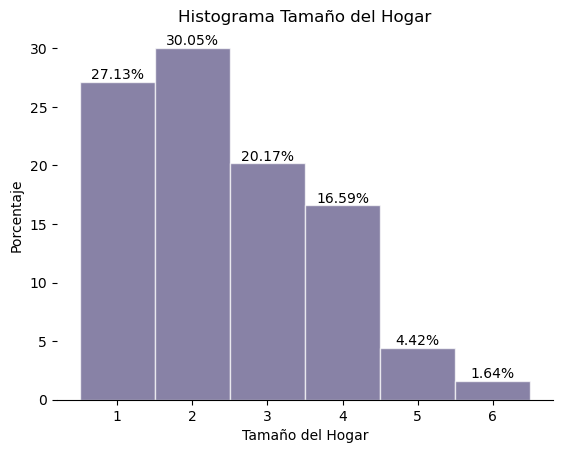

In [17]:
## Histograma con NUMPY ##

# Lista de etiquetas que quieres en el eje X
etiquetas_x = [1, 2, 3, 4, 5, 6,7]  # Número de miembros por hogar

# Calcula el histograma ponderado
hist, bins = np.histogram(df['TAMANO'], bins=etiquetas_x, weights=df['FACTOR'])


# Normaliza los valores para obtener porcentajes en el eje y
porcentajes = (hist / hist.sum()) * 100

# Crea el gráfico de barras
plt.bar(etiquetas_x[:-1], porcentajes, width=np.diff(etiquetas_x), edgecolor='white', alpha=0.7, color='#564D80')

# Agrega etiquetas de porcentaje arriba de las barras
for i, porcentaje in enumerate(porcentajes):
    plt.text(etiquetas_x[i], porcentaje, f'{porcentaje:.2f}%', ha='center', va='bottom')

# Puedes personalizar aún más el histograma, como agregar etiquetas de ejes, título, etc.
plt.xlabel('Tamaño del Hogar')
plt.ylabel('Porcentaje')
plt.title('Histograma Tamaño del Hogar')

# Establece las etiquetas del eje X
plt.xticks(etiquetas_x[:-1])


# Eliminar los márgenes de los ejes superior, derecho e izquierdo
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)


# Muestra el histograma
plt.show()


## Cálculo de ingreso individual por miembro perceptor de ingreso en el hogar

IngresoM = Importe exacto de los ingresos mensuales netos totales del hogar / Número de miembros del hogar perceptores de ingresos

In [18]:
df['ingresoM']=df['IMPEXAC']/df['NUMPERI']

In [19]:
df['ingresoM'].mean()  ## Ingreso medio neto por miembro de hogar sin factor de ponderación

1394.5009524352377

## Cálculo de ingreseo medio neto por actividad de trabajo

In [20]:
df.groupby(["Etiqueta_CCAA", "ACTESTB"])["ingresoM"].mean() # Agrupo las CCAA por ingreso medio por actividad de trabajo

Etiqueta_CCAA  ACTESTB
Andalucía                 855.23
                A         926.15
                B        2144.50
                C        1241.64
                D        1873.05
                           ...  
Rioja, La       Q        1580.56
                R        1039.25
                S        1446.64
                T         865.00
               -9         500.00
Name: ingresoM, Length: 390, dtype: float64

In [21]:
df['ACTESTB'].dtype   ## Nos muestra que es columna es de tipo objeto

dtype('O')

In [22]:
df['ACTESTB'] = df['ACTESTB'].astype(str)  ## Transformo a String (texto)

In [23]:
df['ACTESTB'].value_counts() ## Observo que hay dos categorías que no queremos '-9' y ''  <--- vacío

 C    3435
 G    2500
 O    1959
 F    1744
 Q    1516
 P    1345
 H    1158
 A    1155
 I    1089
 N     787
 M     743
       572
 K     566
 J     498
 T     419
 S     347
 R     261
 E     146
 D     139
 B     108
 L      89
-9       9
Name: ACTESTB, dtype: int64

In [24]:
resultado = df[(df['ACTESTB'] != '-9') & (df['ACTESTB'] != '')].groupby(["Etiqueta_CCAA", "ACTESTB"])["ingresoM"].mean().reset_index()
resultado  ## Tengo problema con la variable ACTESTB porque hay un valor vacío que no está vacío, sino con espacios

,Etiqueta_CCAA,ACTESTB,ingresoM
0,Andalucía,,855.23
1,Andalucía,A,926.15
2,Andalucía,B,2144.50
3,Andalucía,C,1241.64
4,Andalucía,D,1873.05
...,...,...,...
380,"Rioja, La",P,1787.01
381,"Rioja, La",Q,1580.56
382,"Rioja, La",R,1039.25
383,"Rioja, La",S,1446.64


In [25]:
# el resultado de arriba aún no me quita el vacío, debido a que es un ESPACIO, por lo tanto hago lo siguiente:

## Uso función strp() para quitar espacios, como en el siguiente ejemplo:
# cadena = "   Hola, mundo!   "   <--- tiene espacios antes de Hola
# cadena_limpia = cadena.strip()  <--- aplico strip()

# print(cadena_limpia)


resultado = df[(df['ACTESTB'].str.strip() != '-9') & (df['ACTESTB'].str.strip() != '')].groupby(["Etiqueta_CCAA", "ACTESTB"])["ingresoM"].mean().reset_index()
resultado


,Etiqueta_CCAA,ACTESTB,ingresoM
0,Andalucía,A,926.15
1,Andalucía,B,2144.50
2,Andalucía,C,1241.64
3,Andalucía,D,1873.05
4,Andalucía,E,1963.50
...,...,...,...
361,"Rioja, La",P,1787.01
362,"Rioja, La",Q,1580.56
363,"Rioja, La",R,1039.25
364,"Rioja, La",S,1446.64


In [26]:
print(resultado['ACTESTB'].unique())  ## Vemos que aún tenemos espacios antes de las letras, ejemplo: '  A'


[' A' ' B' ' C' ' D' ' E' ' F' ' G' ' H' ' I' ' J' ' K' ' L' ' M' ' N'
 ' O' ' P' ' Q' ' R' ' S' ' T']


In [27]:
resultado['ACTESTB'] = resultado['ACTESTB'].str.strip() # Soluciono este problema


In [28]:
print(resultado['ACTESTB'].unique()) # Ya estaría solucionado

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T']


In [29]:
# Pongo las etiquetas de la variable ACTESTB

correspondencia = {
    'A': 'Agricultura, ganadería, silvicultura y pesca',
    'B': 'Industrias extractivas',
    'C': 'Industria manufacturera',
    'D': 'Suministro de energía eléctrica, gas, vapor y aire acondicionado',
    'E': 'Suministro de agua, actividades de saneamiento, gestión de residuos y descontaminación',
    'F': 'Construcción',
    'G': 'Comercio al por mayor y al por menor; reparación de vehículos de motor y motocicletas',
    'H': 'Transporte y almacenamiento',
    'I': 'Hostelería',
    'J': 'Información y comunicaciones',
    'K': 'Actividades financieras y de seguros',
    'L': 'Actividades inmobiliarias',
    'M': 'Actividades profesionales, científicas y técnicas',
    'N': 'Actividades administrativas y servicios auxiliares',
    'O': 'Administración pública y defensa; seguridad social obligatoria',
    'P': 'Educación',
    'Q': 'Actividades sanitarias y de servicios sociales',
    'R': 'Actividades artísticas, recreativas y de entretenimiento',
    'S': 'Otros servicios',
    'T': 'Actividades de los hogares como empleadores de personal doméstico',
    '': 'No aplicable (si TRABAJO=6)',
    '-9': 'No consta (incluye actividades de organizaciones y organismos extraterritoriales)'
}



# Usa .map() para asignar las etiquetas de acuerdo a ACTESTB, y creo la columna ACTIVIDAD_1
resultado['ACTIVIDAD_1'] = resultado['ACTESTB'].map(correspondencia)

# Muestra las primeras filas del DataFrame con la nueva variable
print(resultado[['ACTESTB', 'ACTIVIDAD_1']].head())

  ACTESTB                                        ACTIVIDAD_1
0       A       Agricultura, ganadería, silvicultura y pesca
1       B                             Industrias extractivas
2       C                            Industria manufacturera
3       D  Suministro de energía eléctrica, gas, vapor y ...
4       E  Suministro de agua, actividades de saneamiento...


In [30]:
print(resultado.columns) # Aseguro que están toas las columnas que necesito


Index(['Etiqueta_CCAA', 'ACTESTB', 'ingresoM', 'ACTIVIDAD_1'], dtype='object')


In [31]:
# Agrupo las CCAA, el tipo de actividad y el ingreso medio de cada actividad

Ingreso_actividad=resultado.groupby(['Etiqueta_CCAA','ACTIVIDAD_1'])["ingresoM"].mean()
Ingreso_actividad

Etiqueta_CCAA  ACTIVIDAD_1                                                                           
Andalucía      Actividades administrativas y servicios auxiliares                                       1011.91
               Actividades artísticas, recreativas y de entretenimiento                                 1328.21
               Actividades de los hogares como empleadores de personal doméstico                         774.56
               Actividades financieras y de seguros                                                     1692.88
               Actividades inmobiliarias                                                                2213.25
                                                                                                          ...  
Rioja, La      Información y comunicaciones                                                             1916.67
               Otros servicios                                                                          1446.64
  

In [32]:
## Lo mismo en formato tabla, usando reset_index y creo la tabla "Ingreso actividad"

Ingreso_actividad = resultado.groupby(['Etiqueta_CCAA', 'ACTIVIDAD_1'])['ingresoM'].mean().reset_index()
Ingreso_actividad 

,Etiqueta_CCAA,ACTIVIDAD_1,ingresoM
0,Andalucía,Actividades administrativas y servicios auxili...,1011.91
1,Andalucía,"Actividades artísticas, recreativas y de entre...",1328.21
2,Andalucía,Actividades de los hogares como empleadores de...,774.56
3,Andalucía,Actividades financieras y de seguros,1692.88
4,Andalucía,Actividades inmobiliarias,2213.25
...,...,...,...
361,"Rioja, La",Información y comunicaciones,1916.67
362,"Rioja, La",Otros servicios,1446.64
363,"Rioja, La","Suministro de agua, actividades de saneamiento...",1763.00
364,"Rioja, La","Suministro de energía eléctrica, gas, vapor y ...",1153.83


### Gráfico de barras del ingreso medio por actividad del trabajador en 2022

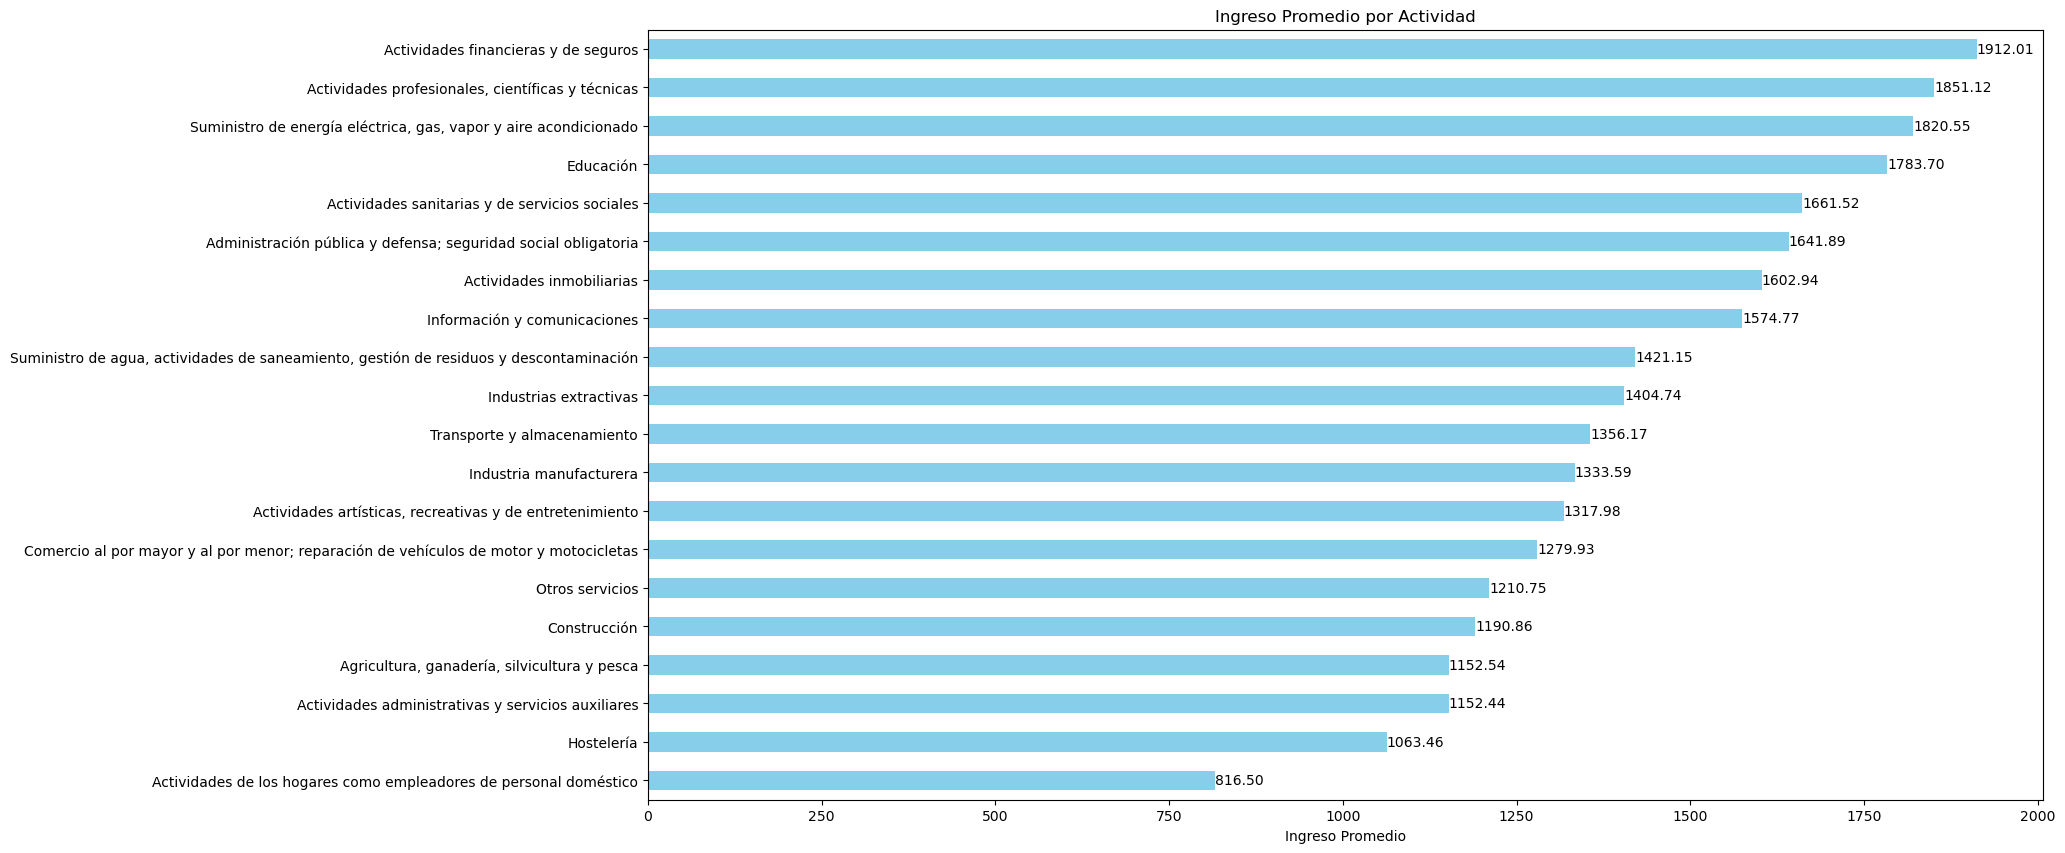

In [33]:
### Gráfico de actividades con su ingreso medio a nivel nacional

# Calcular el ingreso promedio por actividad
ingreso_promedio_por_actividad = Ingreso_actividad.groupby(['ACTIVIDAD_1'])['ingresoM'].mean()

# Ordenar los valores por ingreso promedio de manera descendente
ingreso_promedio_por_actividad = ingreso_promedio_por_actividad.sort_values(ascending=False)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(18, 10))
ax = ingreso_promedio_por_actividad.plot(kind='barh', color='skyblue')
plt.xlabel('Ingreso Promedio')
plt.ylabel('')
plt.title('Ingreso Promedio por Actividad')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la actividad con el ingreso más alto en la parte superior

# Agregar etiquetas de datos a cada barra
for i, valor in enumerate(ingreso_promedio_por_actividad):
    ax.text(valor, i, f'{valor:.2f}', ha='left', va='center', fontsize=10, color='black')

plt.show()


### Gráfico de barras del ingreso medio por actividad del trabajador en 2022 por CCAA

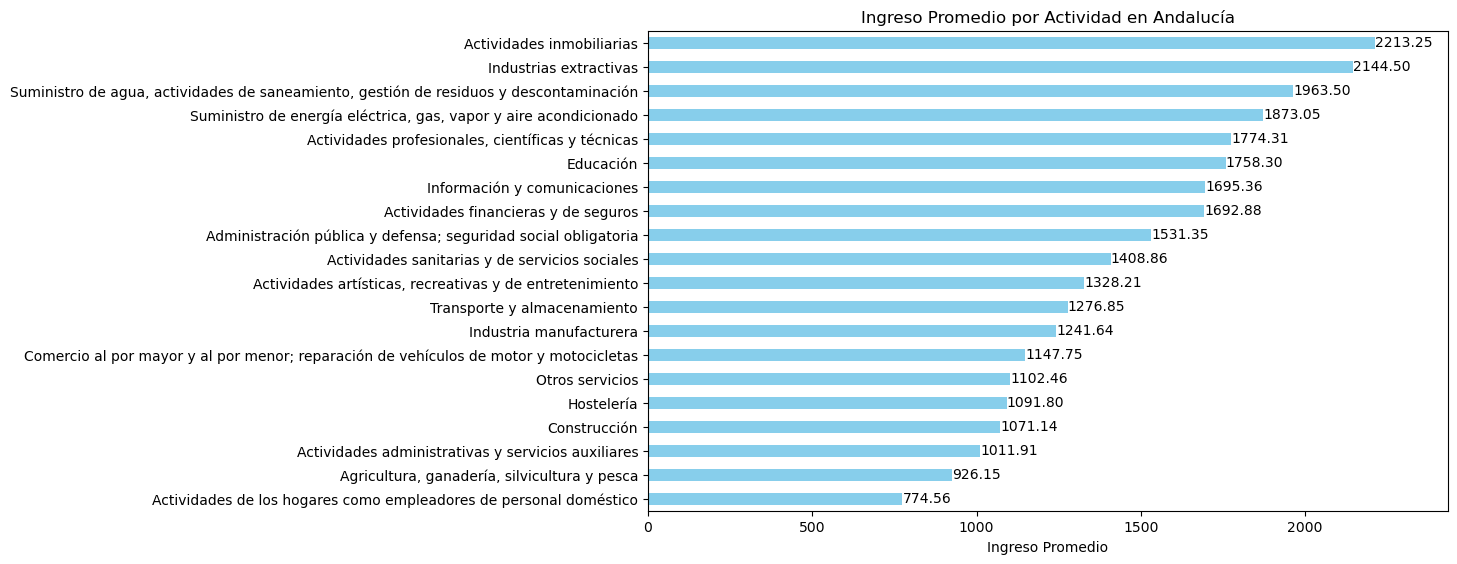

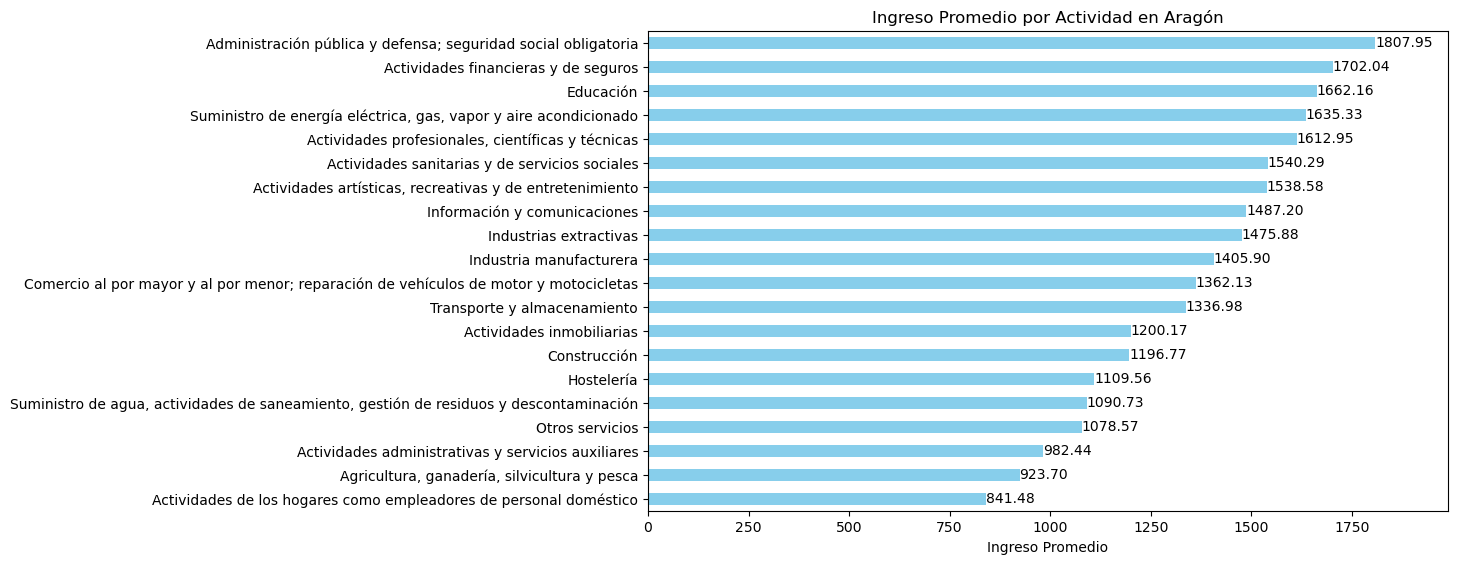

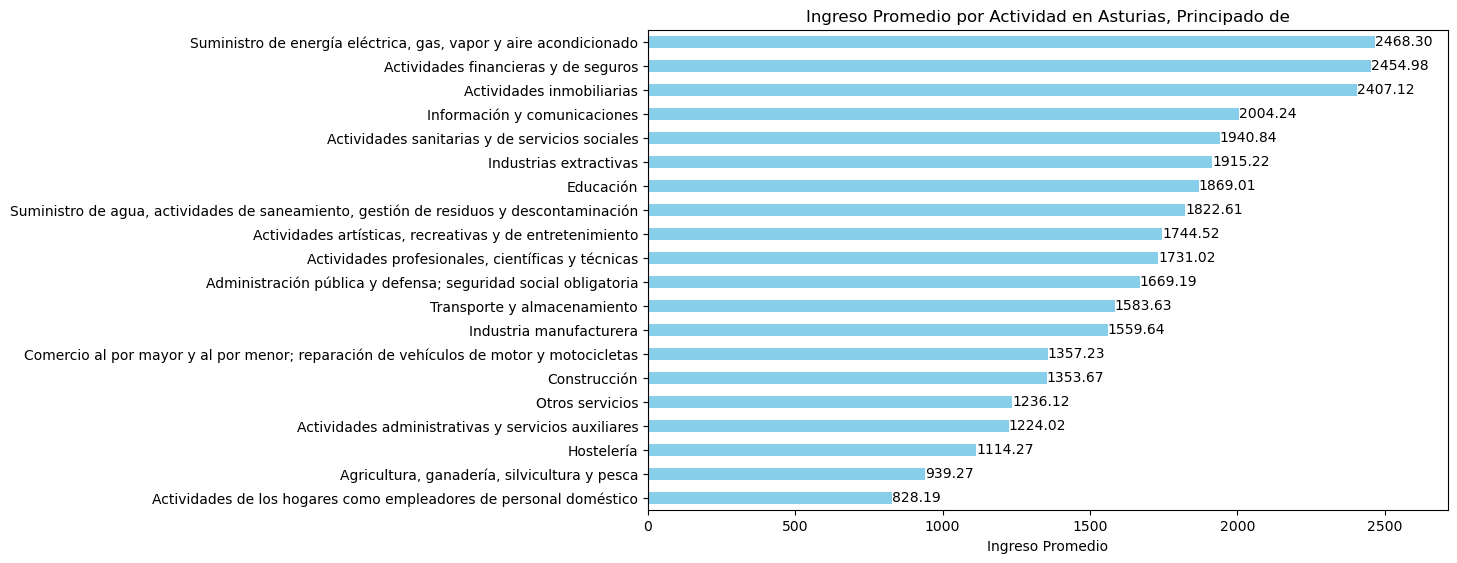

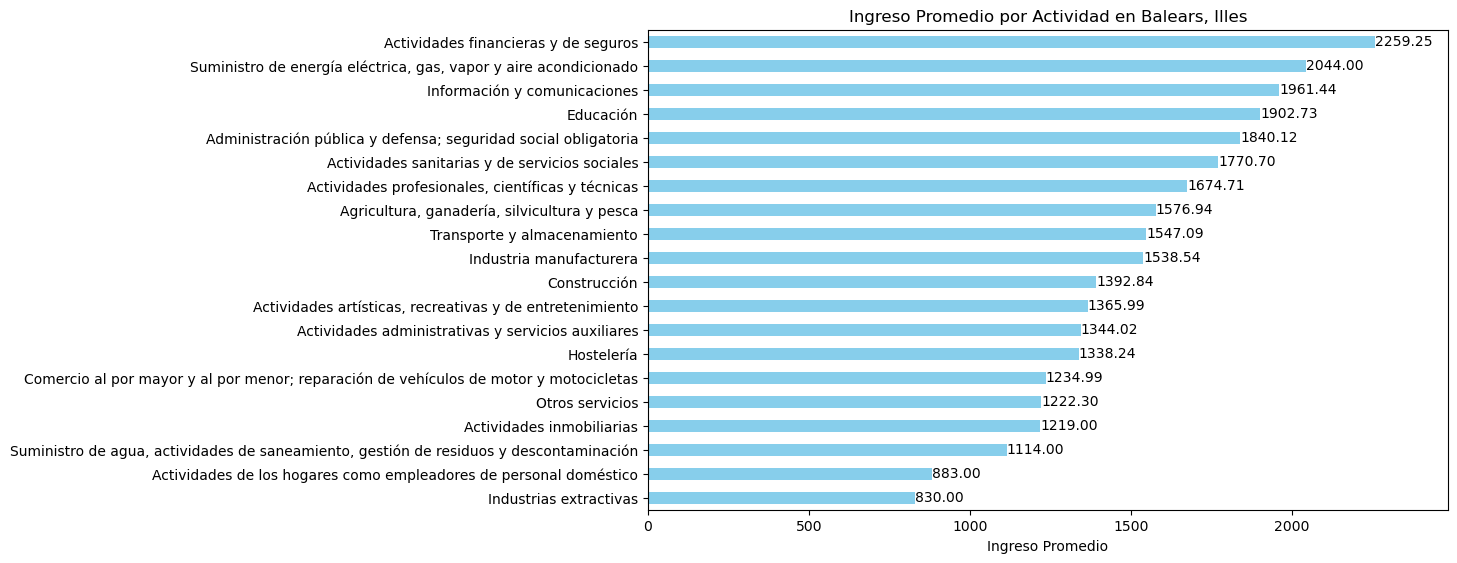

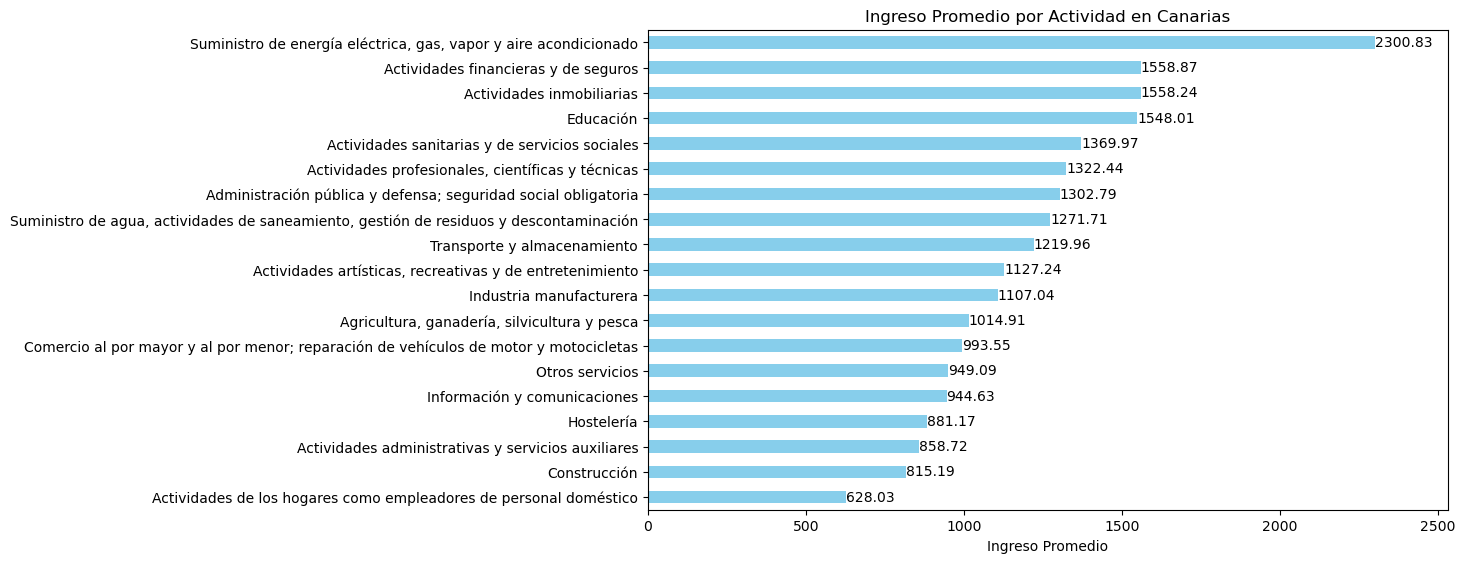

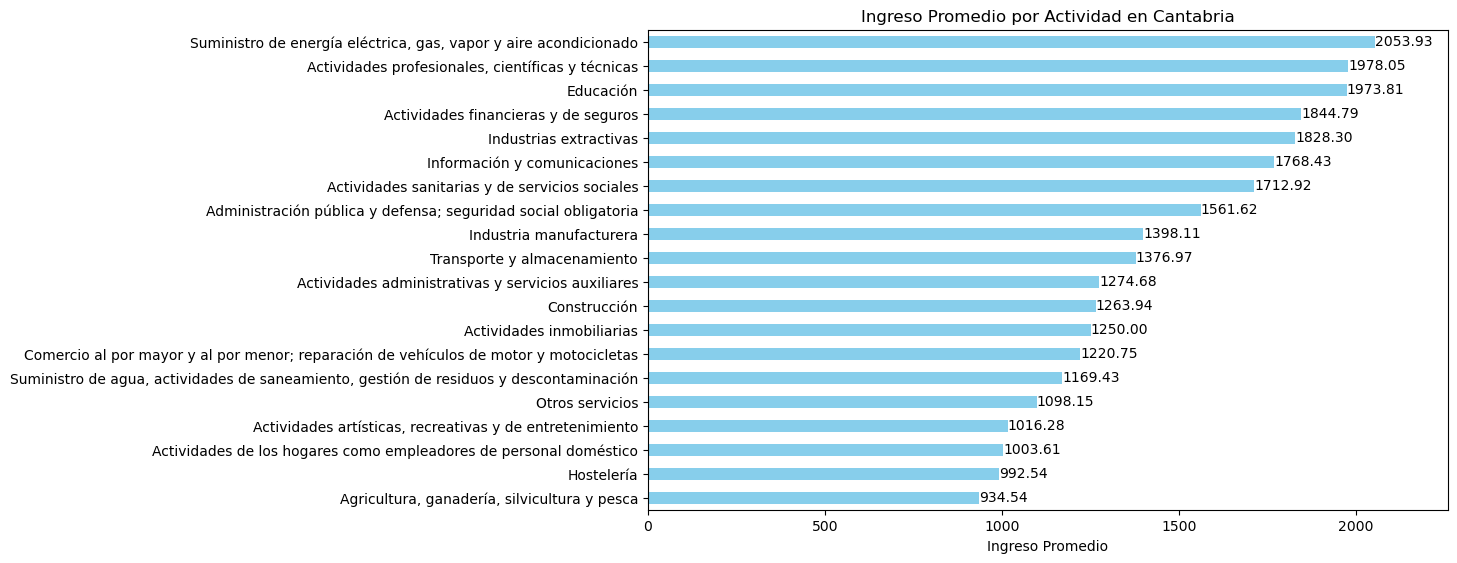

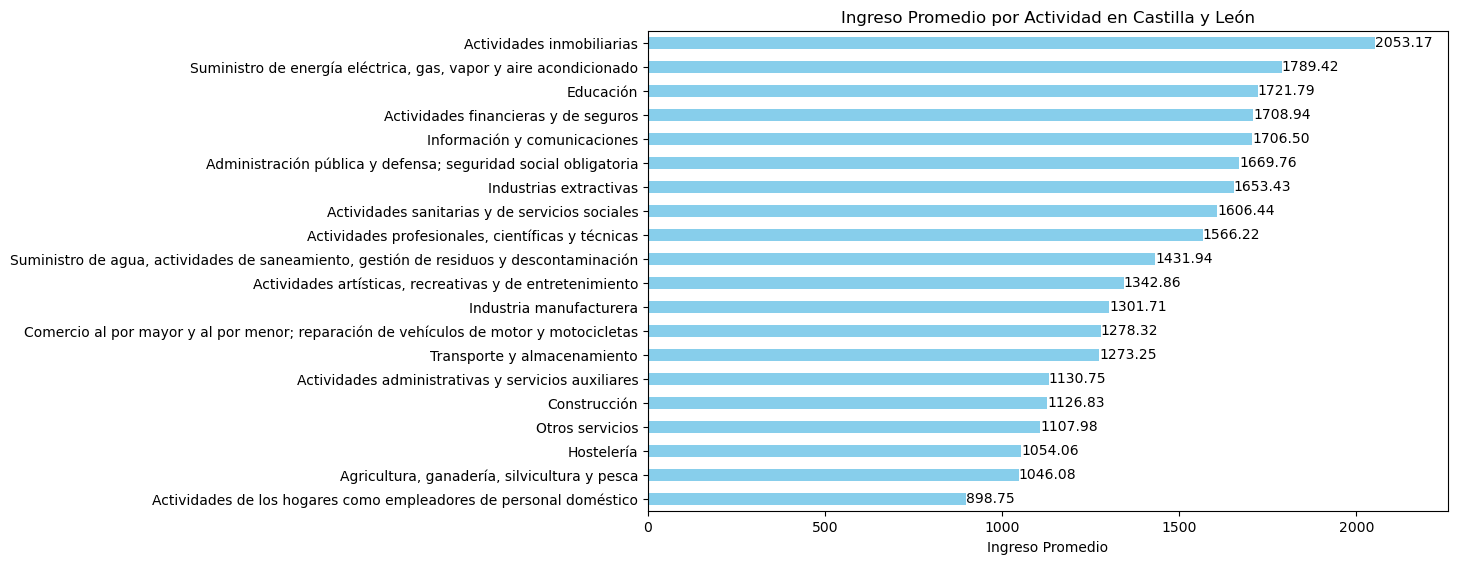

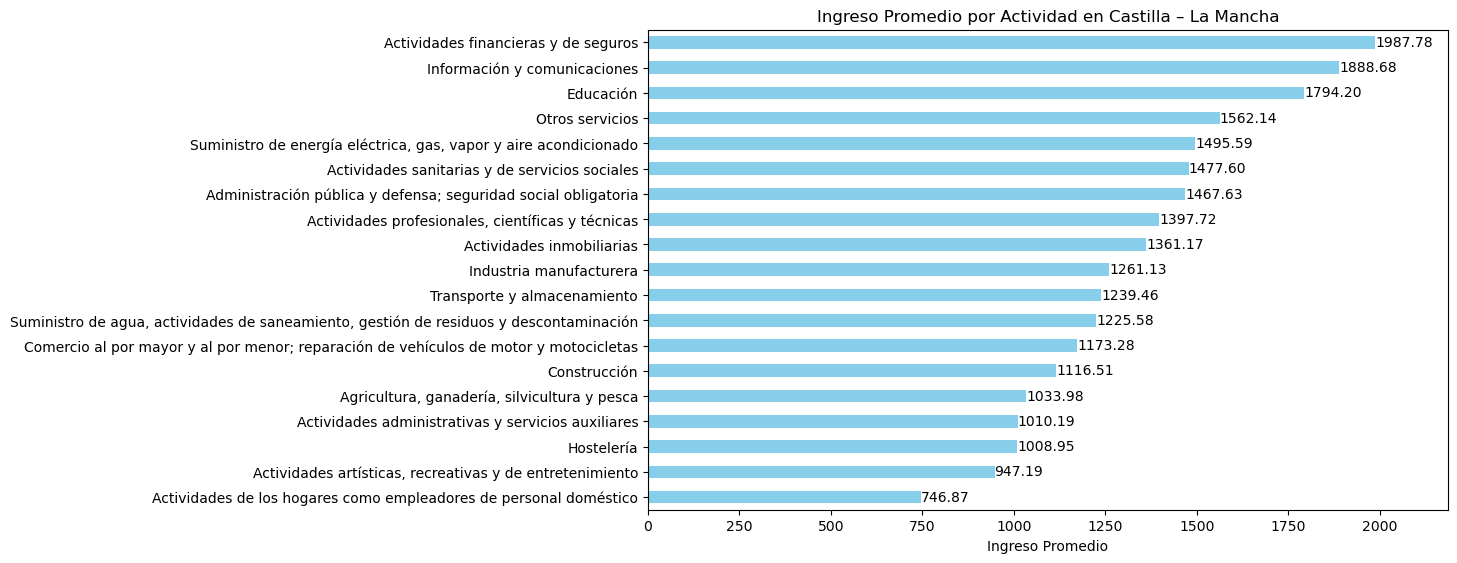

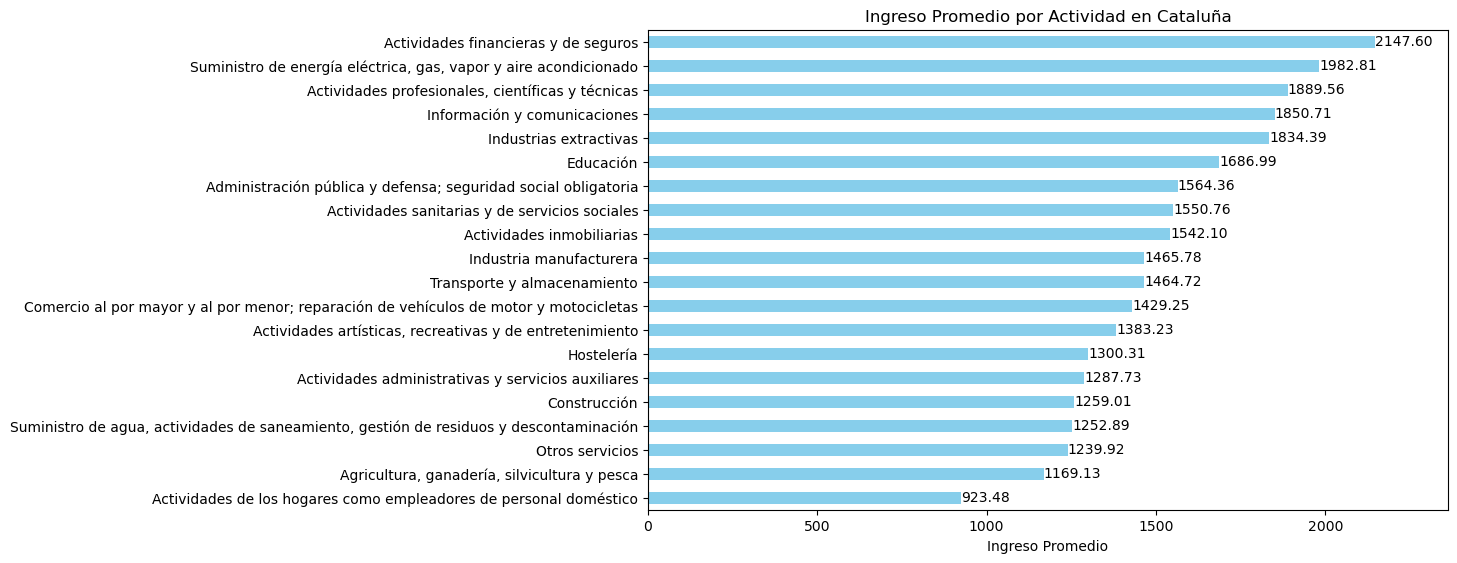

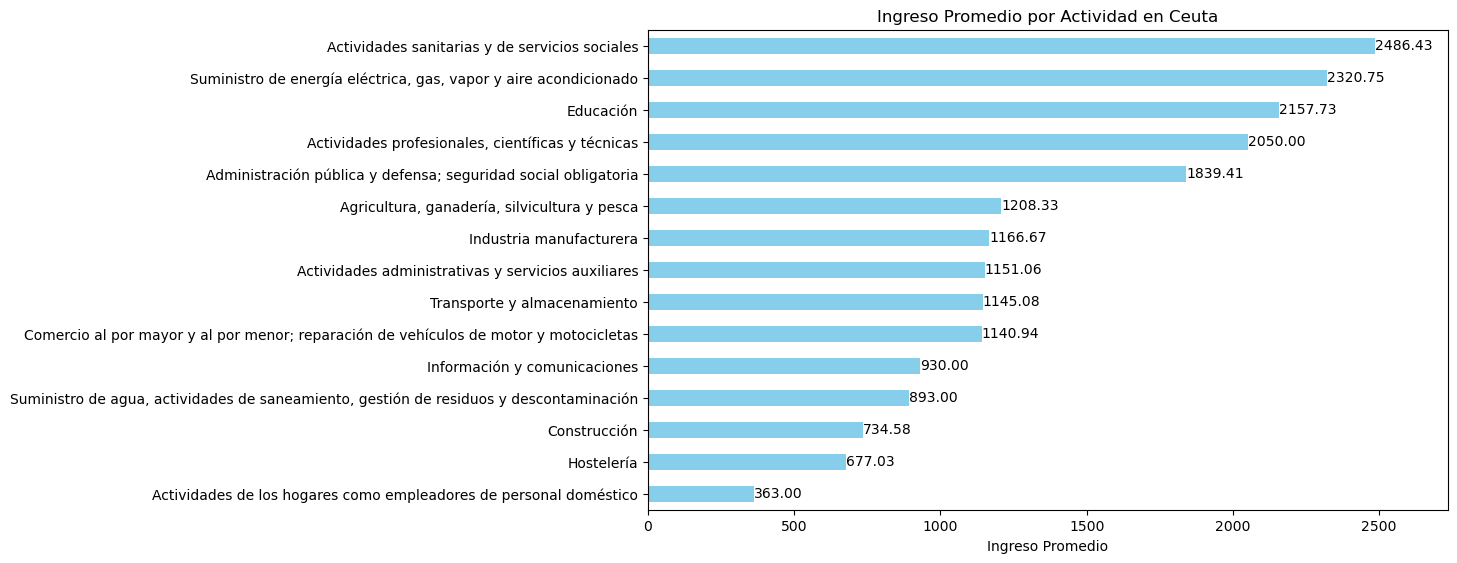

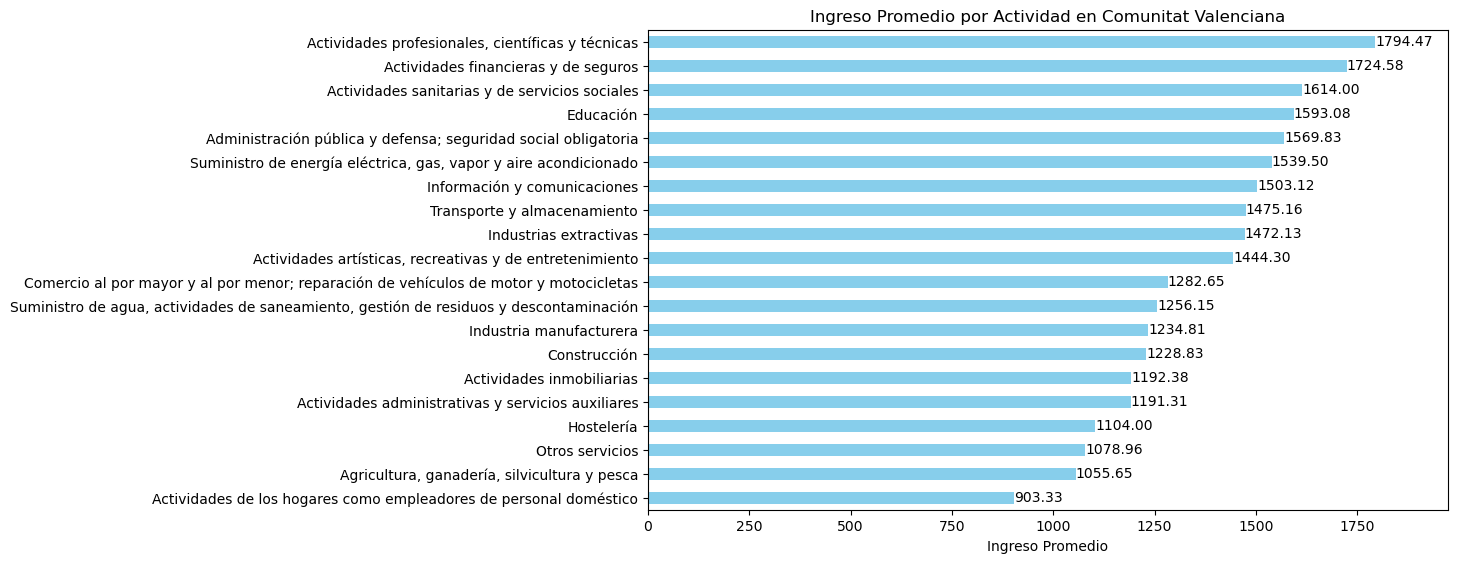

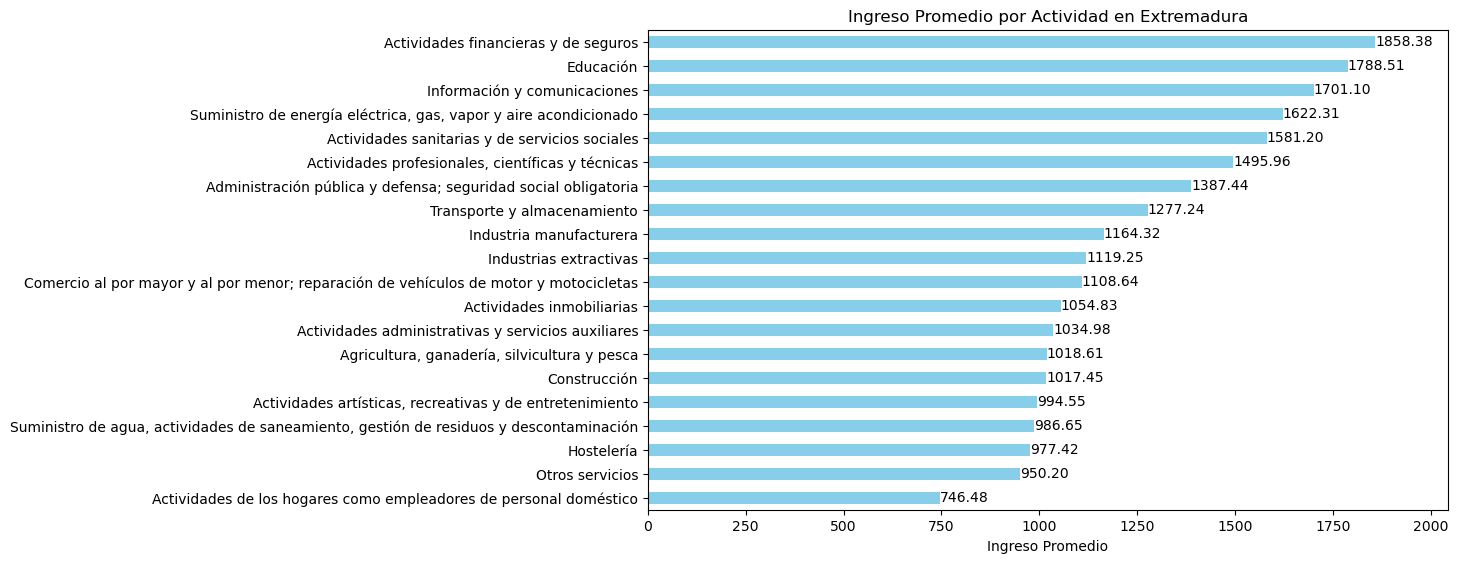

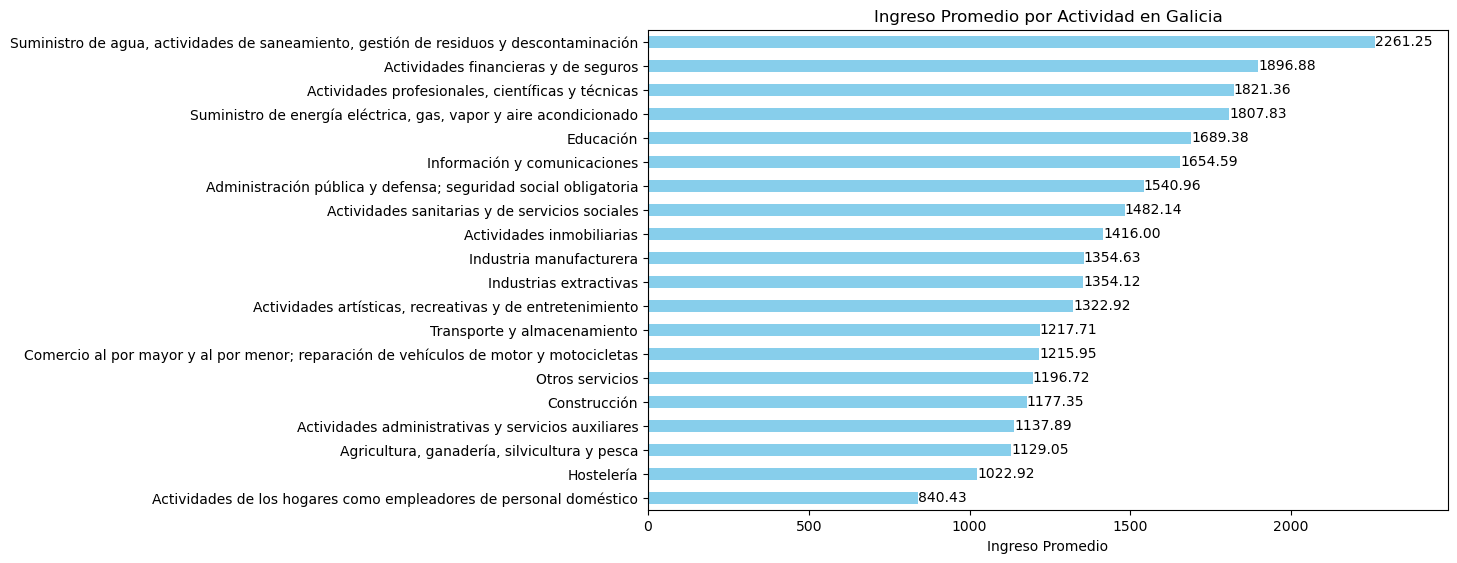

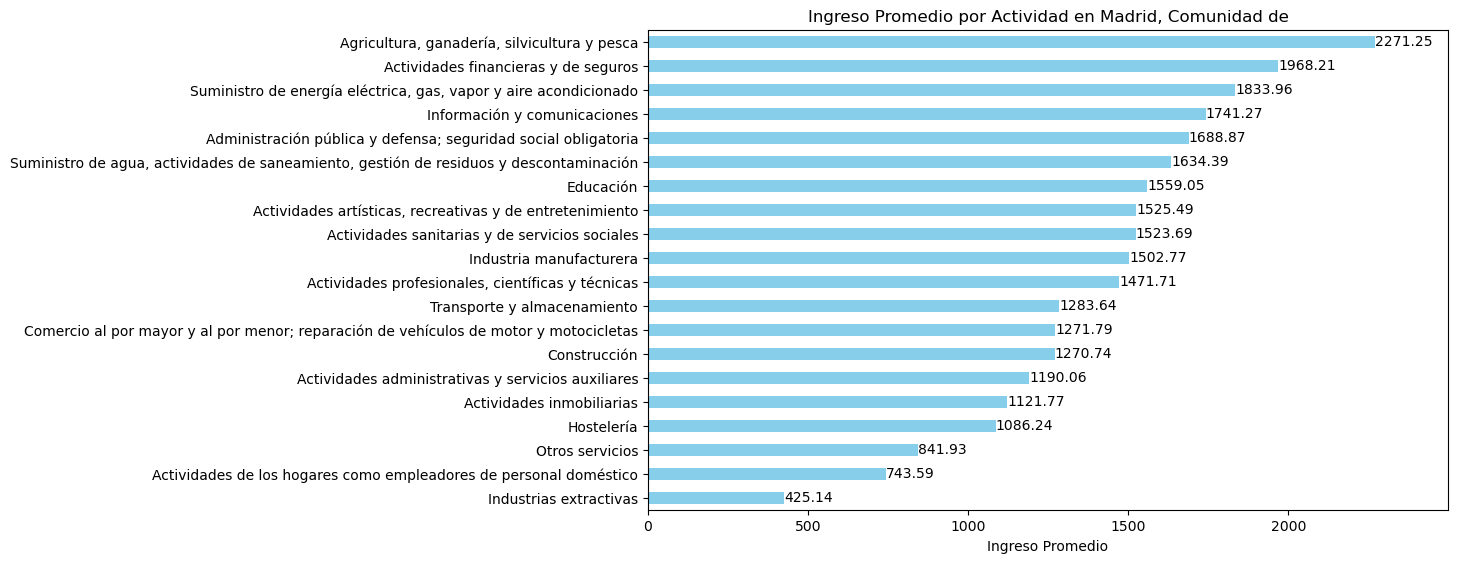

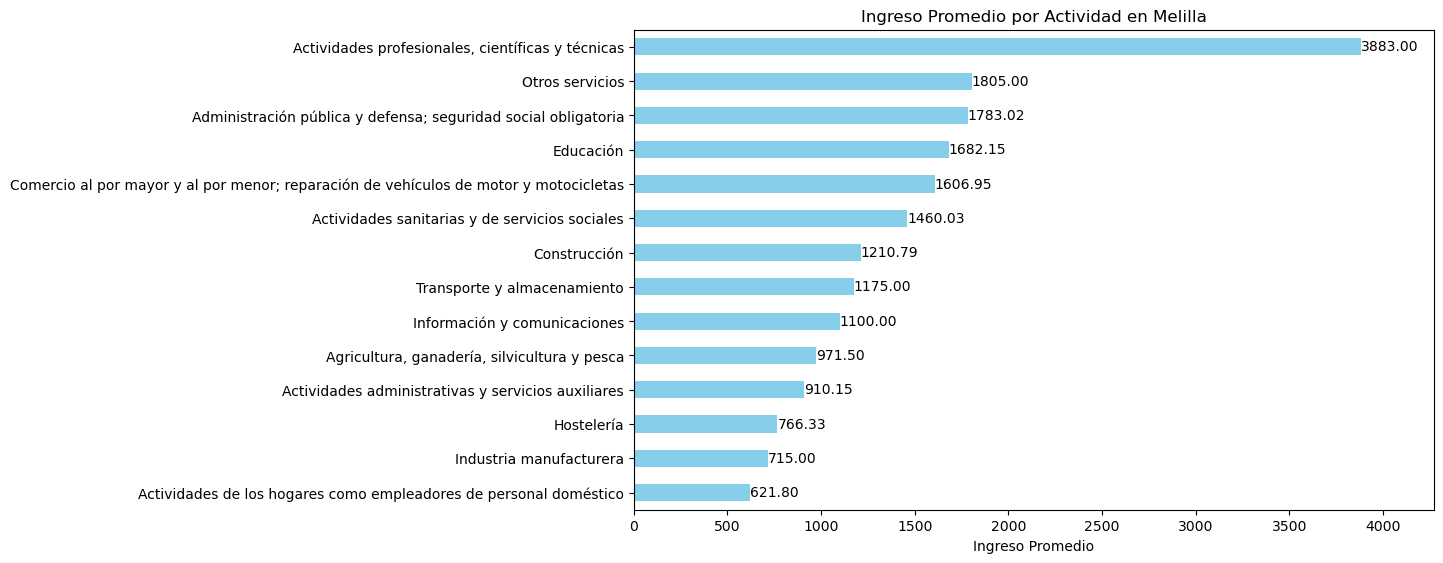

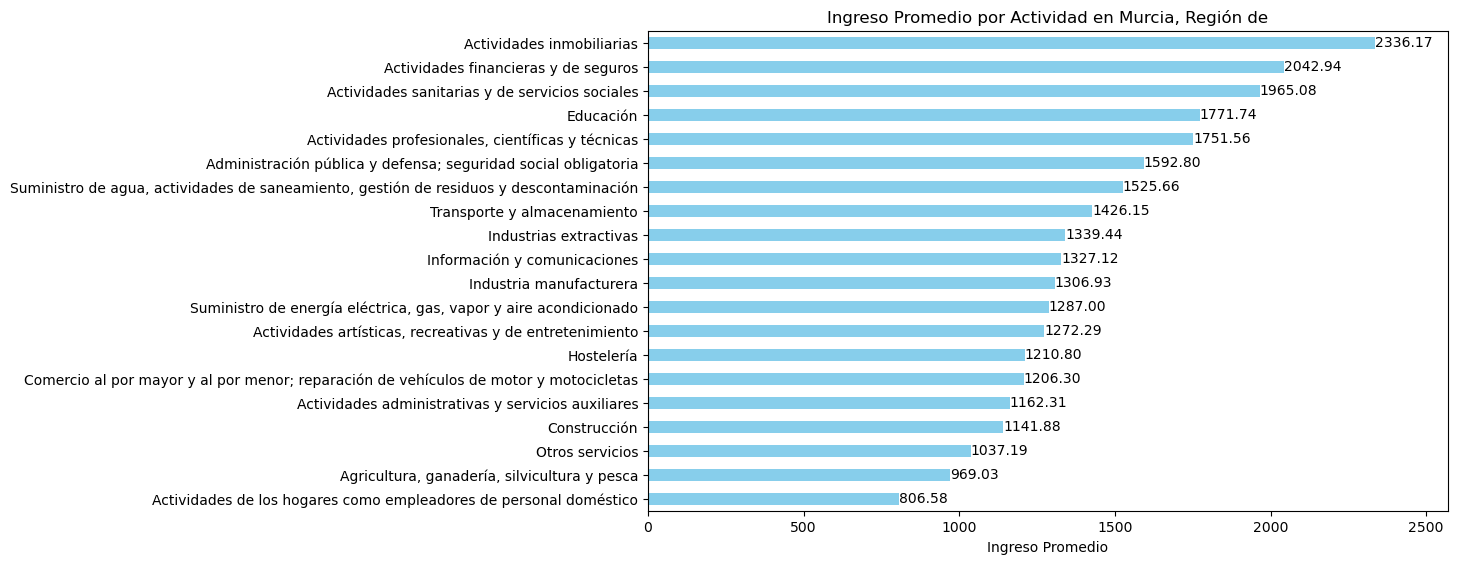

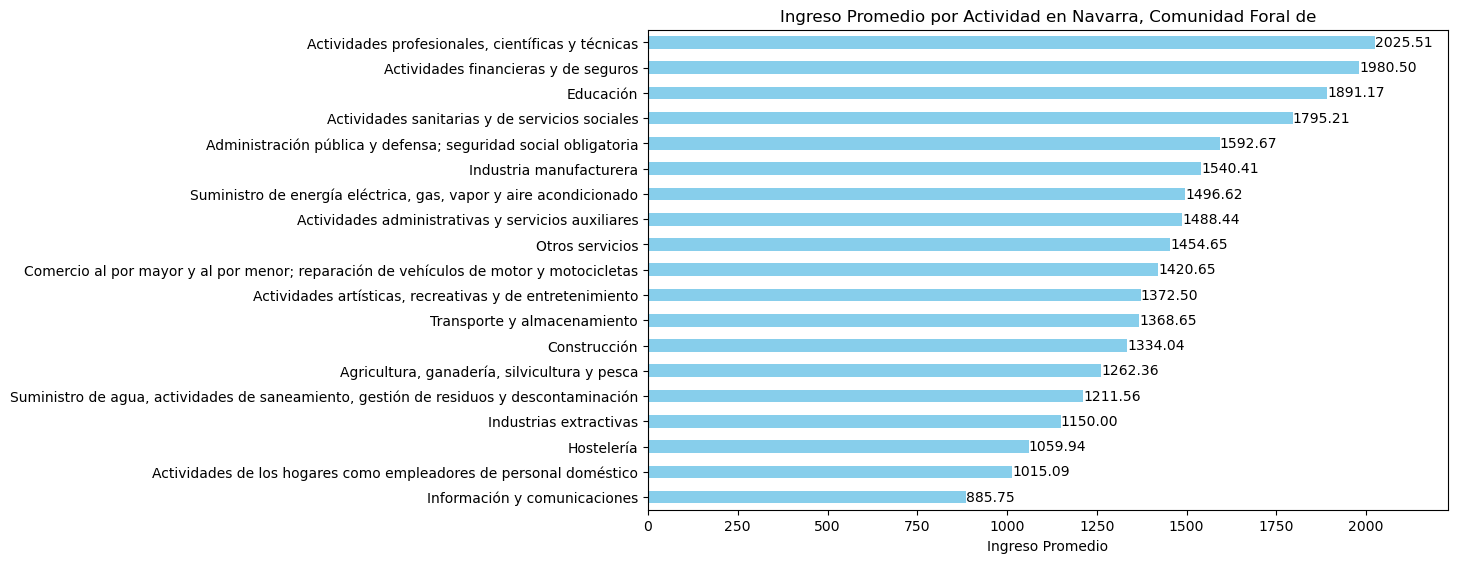

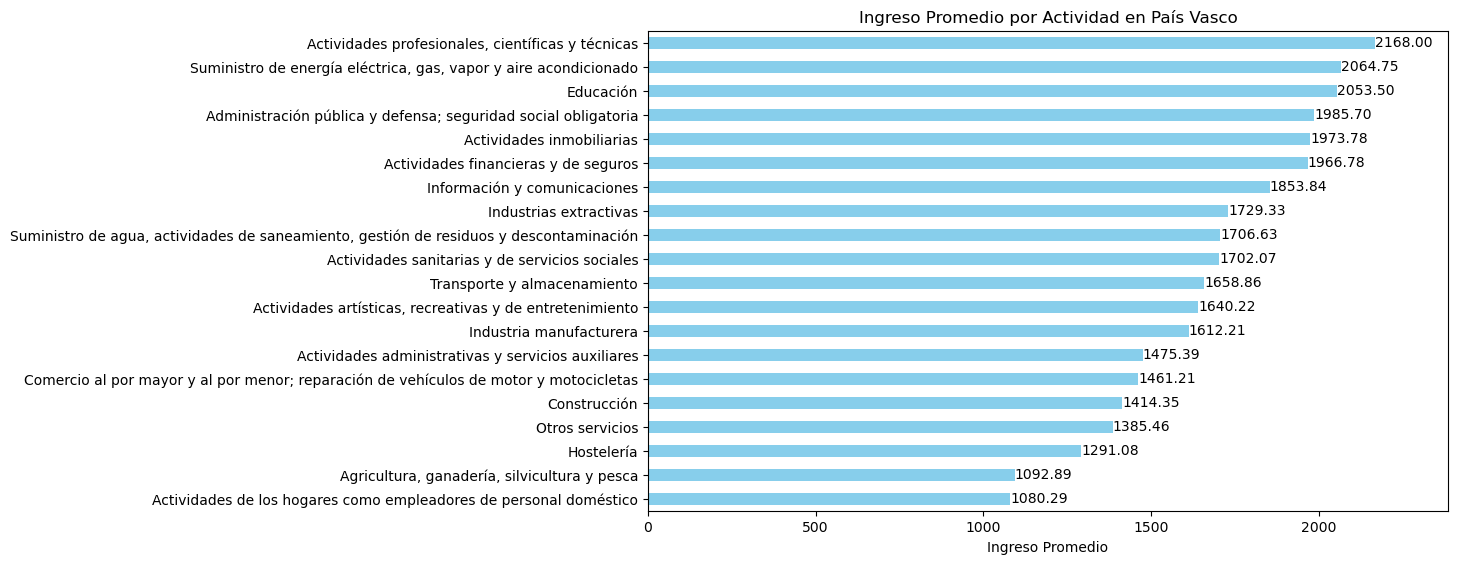

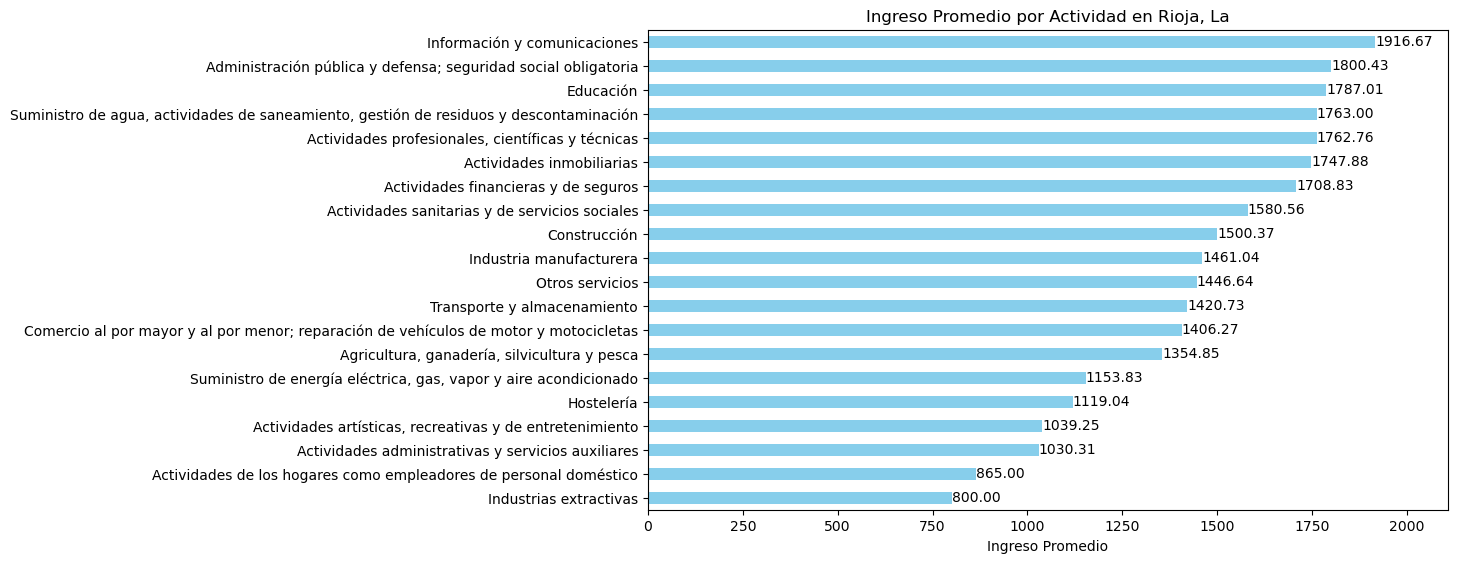

In [34]:
### Gráficos por CCAA

# Obtener la lista de todas las CCAA en tus datos
ccaa_list = Ingreso_actividad['Etiqueta_CCAA'].unique()

# Iterar a través de cada CCAA y crear un gráfico de barras horizontales
for ccaa in ccaa_list:
    # Filtrar los datos para la CCAA actual
    data_ccaa = Ingreso_actividad[Ingreso_actividad['Etiqueta_CCAA'] == ccaa]
    
    # Calcular el ingreso promedio por actividad para la CCAA actual
    ingreso_promedio_por_actividad = data_ccaa.groupby(['ACTIVIDAD_1'])['ingresoM'].mean()
    
    # Ordenar los valores por ingreso promedio de manera descendente
    ingreso_promedio_por_actividad = ingreso_promedio_por_actividad.sort_values(ascending=False)
    
    # Crear el gráfico de barras horizontales
    plt.figure(figsize=(10, 6))
    
    # Configurar márgenes del gráfico
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    
    # Crear el gráfico de barras horizontales
    ingreso_promedio_por_actividad.plot(kind='barh', color='skyblue')
    plt.xlabel('Ingreso Promedio')
    plt.ylabel('')
    plt.title(f'Ingreso Promedio por Actividad en {ccaa}')
    plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la actividad con el ingreso más alto en la parte superior
    
    # Ajustar los límites del eje x para eliminar los márgenes
    plt.xlim(0, ingreso_promedio_por_actividad.max() * 1.1)
    
    # Agregar etiquetas de datos a cada barra
    for i, valor in enumerate(ingreso_promedio_por_actividad):
        plt.text(valor, i, f'{valor:.2f}', ha='left', va='center', fontsize=10, color='black')
    
    plt.show()


In [35]:
# Suponiendo que "resultado" es tu DataFrame
resultado.to_excel('C:/Users/Santiago/Downloads/resultado.xlsx', index=False)

## Ingreso medio por sexo


In [36]:
# Crear la nueva columna "SEXO" basada en la columna "SEXOSP" en el DataFrame df
# Donde 1=Hombre y 6=Mujer

df['SEXO'] = np.where(df['SEXOSP'] == 1, 'Hombre', 'Mujer')

# Verificar los resultados
print(df[['SEXOSP', 'SEXO']])

       SEXOSP    SEXO
0           1  Hombre
1           6   Mujer
2           1  Hombre
3           1  Hombre
4           1  Hombre
...       ...     ...
20580       1  Hombre
20581       1  Hombre
20582       1  Hombre
20583       1  Hombre
20584       1  Hombre

[20585 rows x 2 columns]


In [37]:
ingreso_medio_por_sexo = df[df['PERCEPSP'] == 1].groupby('SEXO')['ingresoM'].mean()

# Convierte el resultado en un DataFrame para facilitar la visualización con .reset_index()
ingreso_medio_por_sexo=ingreso_medio_por_sexo.reset_index()

In [38]:
ingreso_medio_por_sexo

,SEXO,ingresoM
0,Hombre,1472.84
1,Mujer,1385.06


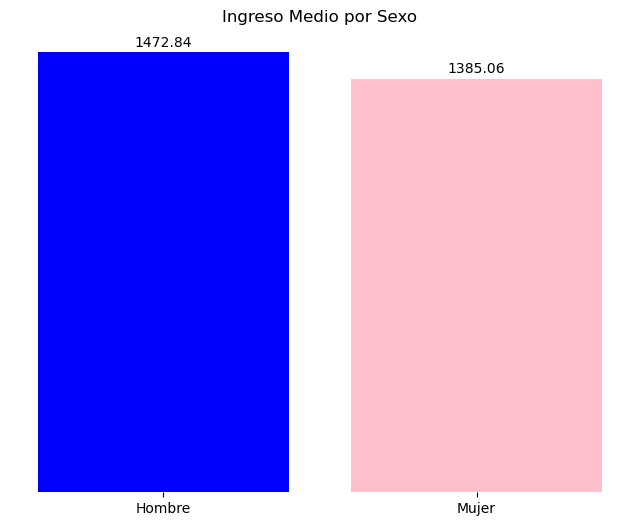

In [39]:
# Crea el gráfico de barras

plt.figure(figsize=(8, 6))
bars=plt.bar(ingreso_medio_por_sexo['SEXO'], ingreso_medio_por_sexo['ingresoM'], color=['blue', 'pink'])

plt.title('Ingreso Medio por Sexo')


# Agrega los valores sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 2),
                 textcoords='offset points', ha='center', va='bottom')


# Elimina las líneas del margen
plt.box(False)

# Oculta el eje Y
plt.gca().axes.get_yaxis().set_visible(False)


# Muestra el gráfico
plt.show()

## Ingreso medio neto por sector de actividad: trabajador público o privado

In [40]:
## Arreglo la variable SECTOR porque tiene espacios antes de los valores
df['SECTOR'] = df['SECTOR'].str.strip()
df['SECTOR'] = df['SECTOR'].astype(str)


In [41]:
df['SECTOR'].unique()

array(['1', '6', '-9', ''], dtype=object)

In [42]:
# Crear la columna 'sectorpp' con las condiciones
df['sectorpp'] = np.where(df['SECTOR'] == '1', 'Público', np.where(df['SECTOR'] == '6', 'Privado', np.nan))


# Verificar los resultados
print(df[['SECTOR', 'sectorpp']])

      SECTOR sectorpp
0          1  Público
1          6  Privado
2          1  Público
3          1  Público
4          6  Privado
...      ...      ...
20580      6  Privado
20581      6  Privado
20582     -9      nan
20583      1  Público
20584      1  Público

[20585 rows x 2 columns]


In [43]:
ingreso_medio_sector=df.groupby('sectorpp')['ingresoM'].mean().reset_index()
ingreso_medio_sector

,sectorpp,ingresoM
0,Privado,1311.71
1,Público,1701.11
2,nan,1304.30


In [44]:
## Quito los nan

ingreso_medio_sector['sectorpp'] = ingreso_medio_sector['sectorpp'].str.strip()
ingreso_medio_sector = ingreso_medio_sector[ingreso_medio_sector['sectorpp'] != 'nan']


In [45]:
ingreso_medio_sector

,sectorpp,ingresoM
0,Privado,1311.71
1,Público,1701.11


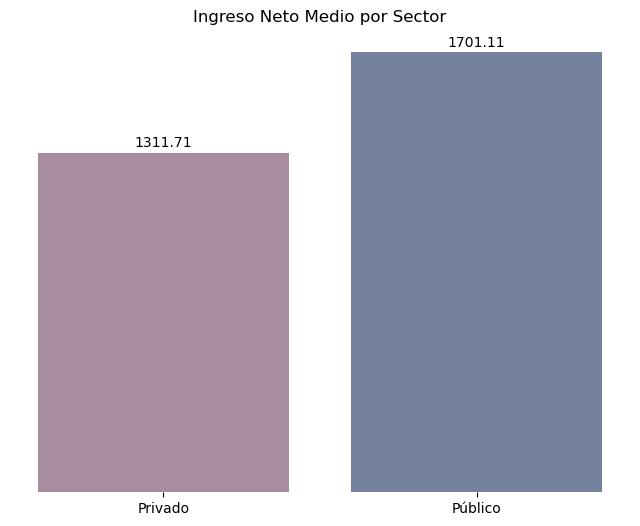

In [46]:
# Crea el gráfico de barras

plt.figure(figsize=(8, 6))
bars=plt.bar(ingreso_medio_sector['sectorpp'], ingreso_medio_sector['ingresoM'], color=['#a78d9e', '#74819d'])

plt.title('Ingreso Neto Medio por Sector')


# Agrega los valores sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 2),
                 textcoords='offset points', ha='center', va='bottom')


# Elimina las líneas del margen
plt.box(False)

# Oculta el eje Y
plt.gca().axes.get_yaxis().set_visible(False)


# Muestra el gráfico
plt.show()

## Ingreso medio neto por nivel de estudios

In [47]:
df['ESTUDREDSP'] # verificamos el tipo de datos de nuestra variable de interés

0        1
1        4
2        4
3        4
4        2
        ..
20580    1
20581    2
20582    4
20583    2
20584    3
Name: ESTUDREDSP, Length: 20585, dtype: int64

In [48]:
# Definir un diccionario que mapee los valores existentes a las nuevas etiquetas
estudios = {
    1: 'Inferior a primera etapa de Educación Secundaria',
    2: 'Primera etapa de Educación secundaria',
    3: 'Segunda etapa de Educación secundaria',
    4: 'Educación superior'
}



# Aplicar el mapeo a una nueva columna llamada 'ETIQUETAS' en tu DataFrame
df['estudios1'] = df['ESTUDREDSP'].map(estudios).fillna('Otro')

In [49]:
df[['estudios1','ESTUDREDSP']]

,estudios1,ESTUDREDSP
0,Inferior a primera etapa de Educación Secundaria,1
1,Educación superior,4
2,Educación superior,4
3,Educación superior,4
4,Primera etapa de Educación secundaria,2
...,...,...
20580,Inferior a primera etapa de Educación Secundaria,1
20581,Primera etapa de Educación secundaria,2
20582,Educación superior,4
20583,Primera etapa de Educación secundaria,2


In [50]:
ingreso_medio_estudios=df.groupby('estudios1')['ingresoM'].mean().reset_index()
ingreso_medio_estudios

,estudios1,ingresoM
0,Educación superior,1743.87
1,Inferior a primera etapa de Educación Secundaria,990.15
2,Primera etapa de Educación secundaria,1166.04
3,Segunda etapa de Educación secundaria,1321.00


In [51]:

# Ordenar el DataFrame por ingresoM de mayor a menor
ingreso_medio_estudios = ingreso_medio_estudios.sort_values(by='ingresoM', ascending=False)
ingreso_medio_estudios

,estudios1,ingresoM
0,Educación superior,1743.87
3,Segunda etapa de Educación secundaria,1321.00
2,Primera etapa de Educación secundaria,1166.04
1,Inferior a primera etapa de Educación Secundaria,990.15


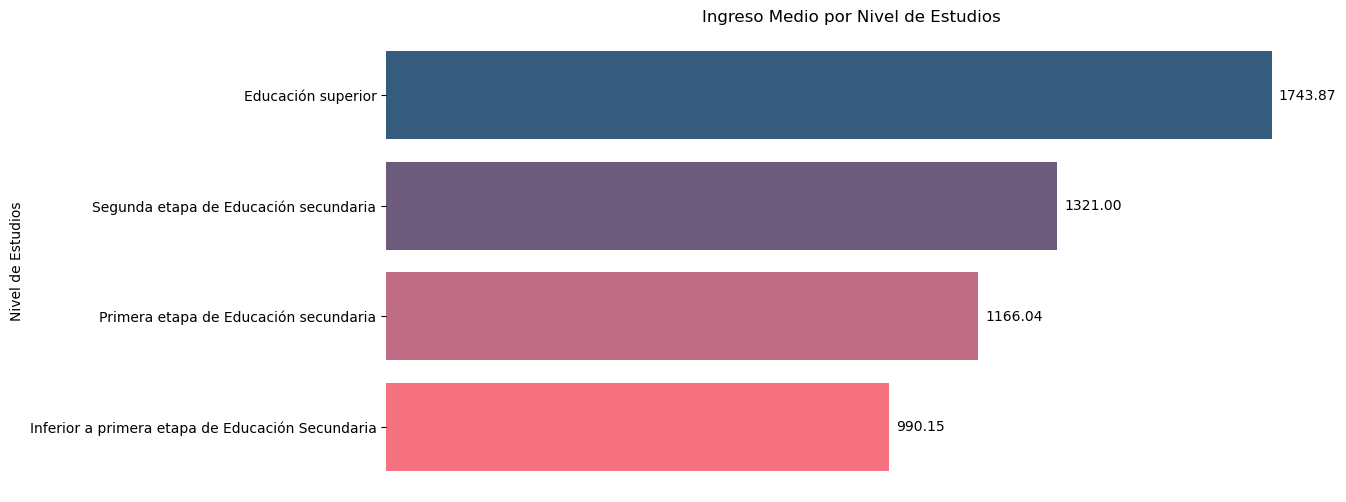

In [52]:
# Datos
estudios = ingreso_medio_estudios['estudios1']
ingreso_promedio = ingreso_medio_estudios['ingresoM']

# Lista de colores (uno por cada barra)
colores = ['#355c7d', '#6c5b7b', '#c06c84', '#f67280']

# Crear el gráfico de barras horizontales
plt.figure(figsize=(12, 6))  # Tamaño de la figura
bar1=plt.barh(estudios, ingreso_promedio, color=colores)  # Crear barras horizontales

# Etiquetas y título
plt.xlabel('Ingreso Medio')
plt.ylabel('Nivel de Estudios')
plt.title('Ingreso Medio por Nivel de Estudios')


# Mostrar el valor sobre cada barra
for bar in bar1:
    width = bar.get_width()
    plt.annotate(f'{width:.2f}', xy=(width, bar.get_y() + bar.get_height() / 2), xytext=(5, 0),
                 textcoords='offset points', ha='left', va='center')


# Elimina las líneas del margen
plt.box(False)

# Oculta el eje X
plt.gca().axes.get_xaxis().set_visible(False)

# Mostrar el gráfico
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la barra más alta arriba
plt.show()


## Ingreso medio neto por nacionalidad

In [53]:
df['NACIONASP'] # Exploro la variable a tratar

0        1
1        1
2        1
3        1
4        1
        ..
20580    1
20581    1
20582    1
20583    1
20584    1
Name: NACIONASP, Length: 20585, dtype: int64

In [54]:
df['NACIONASP'].unique() # Exploro la variable a tratar

array([1, 3, 2], dtype=int64)

In [55]:
# Asigno las etiquetas y creo una nueva variable llamada 'nacionalidad'
nacional = {
    1: 'Española',
    2: 'Extranjera',
    3: 'Doble \n nacionalidad'
}

# Aplicar el mapeo a una nueva columna llamada 'ETIQUETAS' en tu DataFrame
df['nacionalidad'] = df['NACIONASP'].map(nacional)

In [56]:
df['nacionalidad'].unique() #Exploro la nueva variable creada

array(['Española', 'Doble \n nacionalidad', 'Extranjera'], dtype=object)

In [57]:
df[['nacionalidad', 'NACIONASP']]  #Exploro la nueva variable creada

,nacionalidad,NACIONASP
0,Española,1
1,Española,1
2,Española,1
3,Española,1
4,Española,1
...,...,...
20580,Española,1
20581,Española,1
20582,Española,1
20583,Española,1


In [58]:
df['nacionalidad'].value_counts()  #Exploro la nueva variable creada

Española                 18938
Extranjera                1067
Doble \n nacionalidad      580
Name: nacionalidad, dtype: int64

In [59]:
ingreso_medio_nacionalidad=df.groupby('nacionalidad')['ingresoM'].mean().reset_index()
ingreso_medio_nacionalidad

,nacionalidad,ingresoM
0,Doble \n nacionalidad,1151.89
1,Española,1416.06
2,Extranjera,1139.42


In [60]:
# Ordenar el DataFrame por ingresoM de mayor a menor
ingreso_medio_nacionalidad = ingreso_medio_nacionalidad.sort_values(by='ingresoM', ascending=False)
ingreso_medio_nacionalidad

,nacionalidad,ingresoM
1,Española,1416.06
0,Doble \n nacionalidad,1151.89
2,Extranjera,1139.42


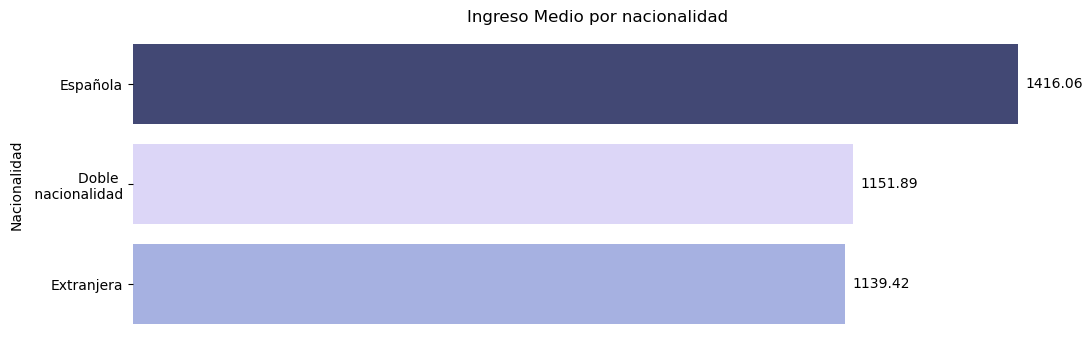

In [68]:
# Datos
nacion1 = ingreso_medio_nacionalidad['nacionalidad']
ingreso_promedio1 = ingreso_medio_nacionalidad['ingresoM']

# Lista de colores (uno por cada barra)
colores = ['#424874', '#DCD6F7', '#A6B1E1']

# Crear el gráfico de barras horizontales
plt.figure(figsize=(12, 4))  # Tamaño de la figura
bar1=plt.barh(nacion1, ingreso_promedio1, color=colores)  # Crear barras horizontales

# Etiquetas y título
plt.xlabel('Ingreso Medio')
plt.ylabel('Nacionalidad')
plt.title('Ingreso Medio por nacionalidad')


# Mostrar el valor sobre cada barra
for bar in bar1:
    width = bar.get_width()
    plt.annotate(f'{width:.2f}', xy=(width, bar.get_y() + bar.get_height() / 2), xytext=(5, 0),
                 textcoords='offset points', ha='left', va='center')


# Elimina las líneas del margen
plt.box(False)

# Oculta el eje X
plt.gca().axes.get_xaxis().set_visible(False)

# Mostrar el gráfico
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la barra más alta arriba
plt.show()